# Project – Low-rank approximation techniques

### Topic
Volume maximization for cross approximation

### Authors 
Anna Paulish & Fabio Matti

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.algorithms import ACA_SPSD, Algorithm1
from src.matrices import get_A1, get_A2, get_A3
from src.helpers import volume, ACA_error, max_volume_index_set

## Task 1

Set the parameters $n$ and $k$

In [3]:
n = 7
k = 6

Get the matrix $A_1$

In [4]:
A1 = get_A1(n=n)

Find index set using adaptive cross approximation and using direct search

In [5]:
I = ACA_SPSD(A1, k=k)
J = max_volume_index_set(A1, k)

Compare volumes of ACA submatrix $A_1(I, I)$ to maximum volume submatrix $A_1(J, J)$

In [6]:
vol_II = volume(A1[np.ix_(I, I)])
vol_JJ = volume(A1[np.ix_(J, J)])

print("Volume of A_1(I, I) = {:.3e}".format(vol_II))
print("Volume of A_1(J, J) = {:.3e}".format(vol_JJ))

Volume of A_1(I, I) = 1.311e-16
Volume of A_1(J, J) = 1.000e-13


## Task 2

In [7]:
# Implementation of Task 2
I1 = Algorithm1(A1, k=k)
vol_I1 = volume(A1[np.ix_(I1, I1)])

print("Volume of A_1(I1, I1) = {:.3e}".format(vol_I1))

Volume of A_1(I1, I1) = 1.000e-13


## Task 3

Set the parameters $n$ and specify range of $k \in \{1, ..., K\}$

In [8]:
n = 200
K = 100
k_list = np.arange(1, K+1, dtype=int)

Get the matrix $A_2$

In [9]:
A2 = get_A2(n=n)

Plot progression of cross approximations for $A_2$

c:\Users\User\anaconda3\envs\milad\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


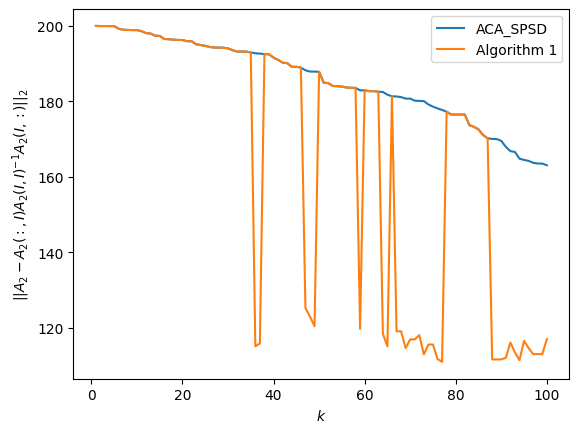

In [10]:
A2_errors = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I = ACA_SPSD(A2, k)
    A2_errors[idx] = ACA_error(A2, I, ord=2)

# Same for Algorithm 1
A2_errors_algorithm1 = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I1 = Algorithm1(A2, k)
    A2_errors_algorithm1[idx] = ACA_error(A2, I1, ord=2)

plt.plot(k_list, A2_errors, label = "ACA_SPSD")
plt.plot(k_list, A2_errors_algorithm1, label = "Algorithm 1")

plt.legend()
plt.xlabel("$k$")
plt.ylabel("$||A_2 - A_2(:, I) A_2(I, I)^{-1} A_2(I, :)||_2$")
plt.show()

Get the matrix $A_3$

In [11]:
A3 = get_A3(n=n)

Plot progression of cross approximations for $A_3$

In [12]:
K = 20  # Hilbert matrix is numerically not invertible for K >~ 20
k_list = np.arange(1, K+1, dtype=int)

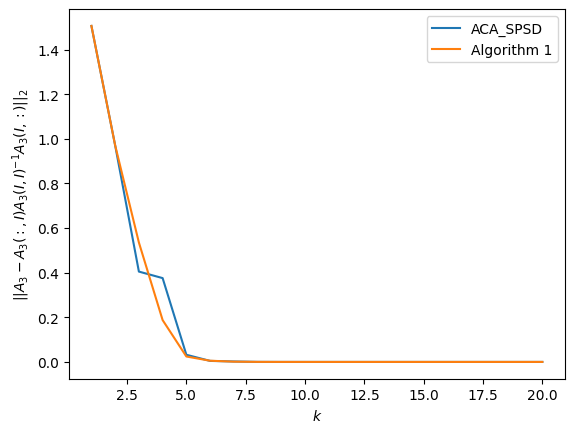

In [13]:
A3_errors = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I = ACA_SPSD(A3, k)
    A3_errors[idx] = ACA_error(A3, I, ord=2)

#Same for Algorithm 1
A3_errors_algorithm1  = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I1 = Algorithm1(A3, k)
    A3_errors_algorithm1[idx] = ACA_error(A3, I1, ord=2)

plt.plot(k_list, A3_errors, label = "ACA_SPSD")
plt.plot(k_list, A3_errors_algorithm1, label = "Algorithm 1")

plt.legend()
plt.xlabel("$k$")
plt.ylabel("$||A_3 - A_3(:, I) A_3(I, I)^{-1} A_3(I, :)||_2$")
plt.show()